In [23]:
!pip install pandas

In [ ]:
!pip install seaborn
!pip install matplotlib

     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     --- --------------------------------- 30.7/293.3 kB 660.6 kB/s eta 0:00:01
     ----- ------------------------------- 41.0/293.3 kB 495.5 kB/s eta 0:00:01
     ------------- ---------------------- 112.6/293.3 kB 939.4 kB/s eta 0:00:01
     ----------------------------- -------- 225.3/293.3 kB 1.3 MB/s eta 0:00:01
     -------------------------------------  286.7/293.3 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 1.3 MB/s eta 0:00:00
  Obtaining dependency information for matplotlib!=3.6.1,>=3.1 from https://files.pythonhosted.org/packages/c9/46/6cbaf20f5bd0e7c1d204b45b853c2cd317b303fada90245f2825ecca47de/matplotlib-3.7.2-cp39-cp39-win_amd64.whl.metadata
  Using cached matplotlib-3.7.2-cp39-cp39-win_amd64.whl.metadata (5.8 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/a5/d6/80258c2759bd34abe267b5d3bc6300f7105aa7018

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [ ]:
dir_datos = './Data/Datos_Rotulos_Trafico/'

In [ ]:
trayecto_test = os.path.join(dir_datos, 'prueba.p')
trayecto_train = os.path.join(dir_datos, 'entrenamiento.p')
trayecto_validation = os.path.join(dir_datos, 'validacion.p')

In [ ]:
if os.path.exists(trayecto_test):
    print("El archivo prueba.p existe en la ruta especificada.")
else:
    raise Exception("El archivo prueba.p no existe en la ruta especificada.")

El archivo prueba.p existe en la ruta especificada.


In [ ]:
if os.path.exists(trayecto_train):
    print("El archivo entrenamiento.p existe en la ruta especificada.")
else:
    raise Exception("El archivo entrenamiento.p no existe en la ruta especificada.")

El archivo entrenamiento.p existe en la ruta especificada.


### Obtener Data

In [ ]:
import pickle

def get_data(filePath):
    with open(filePath, "rb") as archivo:
        objeto_cargado = pickle.load(archivo)

    y = objeto_cargado.pop('labels')
    x = objeto_cargado.pop('features')
    return x, y

X_train, y_train = get_data(os.path.join(dir_datos, 'entrenamiento.p'))
X_test, y_test = get_data(os.path.join(dir_datos, 'prueba.p'))
X_validation, y_validation = get_data(os.path.join(dir_datos, 'validacion.p'))

### Se validan las dimensiones de las imagenes

In [ ]:
last = X_train[0].shape
diferencia = False

for img in X_train:
    if img.shape != last:
        diferencia = True

if diferencia:
    print('Hay dimensiones diferentes en las imagenes de entreno')

else:
    print('No hay dimensiones diferentes en las imagenes de entreno')

last = X_test[0].shape
diferencia = False

for img in X_test:
    if img.shape != last:
        diferencia = True

if diferencia:
    print('Hay dimensiones diferentes en las imagenes de testing')

else:
    print('No hay dimensiones diferentes en las imagenes de testing')

last = X_validation[0].shape
diferencia = False

for img in X_validation:
    if img.shape != last:
        diferencia = True

if diferencia:
    print('Hay dimensiones diferentes en las imagenes de Validacion')

else:
    print('No hay dimensiones diferentes en las imagenes de Validacion')


No hay dimensiones diferentes en las imagenes de entreno
No hay dimensiones diferentes en las imagenes de testing
No hay dimensiones diferentes en las imagenes de Validacion


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_validation = to_categorical(y_validation)

### Normalizacion

In [ ]:
X_train[0].min()

19

In [ ]:
X_train[0].max()

113

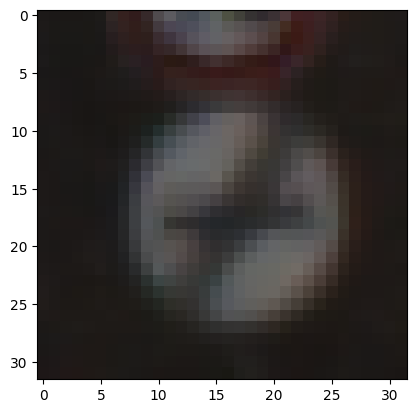

In [ ]:
plt.imshow(X_train[0])

In [ ]:
X_train = X_train / (113-19)
X_test = X_test / (113-19)
X_validation = X_validation / (113-19)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


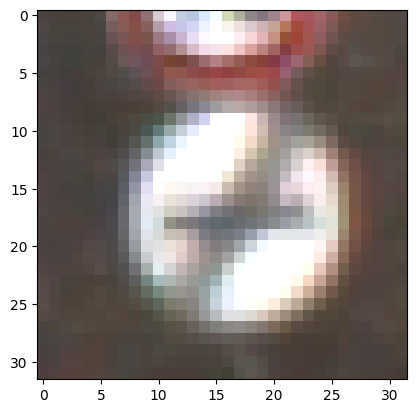

In [ ]:
plt.imshow(X_train[0])

In [ ]:
X_train.shape

(34799, 32, 32, 3)

### Entreno

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
modelo = Sequential()

# Capa convolucional
# modelo.add(Conv2D(filters = 32, kernel_size = (4, 4), input_shape = (32, 32, 3), activation = 'relu'))
modelo.add(Conv2D(filters = 3, kernel_size = (4, 4), input_shape = (32, 32, 3), activation = 'relu'))

# # Capa pooling
# modelo.add(MaxPool2D(pool_size = (2, 2)))

# # Capa aplanada
# modelo.add(Flatten())

# # Hidden layers
# modelo.add(Dense(128, activation = 'relu'))

# # Clasificadora (softmax)
# modelo.add(Dense(10, activation = 'softmax'))

In [ ]:
modelo.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

modelo.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 29, 29, 3)         147       
                                                                 
Total params: 147 (588.00 Byte)
Trainable params: 147 (588.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
detencion_temprana = EarlyStopping(monitor = 'val_loss', patience = 2)

modelo.fit(
    X_train,
    y_train,
    epochs = 10,
    validation_data = (X_test, y_test),
    callbacks = [detencion_temprana]
)

Epoch 1/10


ValueError: in user code:

    File "d:\GitHub\Semestre-8\Lab2-DS\venv\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "d:\GitHub\Semestre-8\Lab2-DS\venv\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\GitHub\Semestre-8\Lab2-DS\venv\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "d:\GitHub\Semestre-8\Lab2-DS\venv\Lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "d:\GitHub\Semestre-8\Lab2-DS\venv\Lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "d:\GitHub\Semestre-8\Lab2-DS\venv\Lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "d:\GitHub\Semestre-8\Lab2-DS\venv\Lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "d:\GitHub\Semestre-8\Lab2-DS\venv\Lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "d:\GitHub\Semestre-8\Lab2-DS\venv\Lib\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "d:\GitHub\Semestre-8\Lab2-DS\venv\Lib\site-packages\keras\src\backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 43) and (None, 29, 29, 3) are incompatible


### Testing

In [ ]:
modelo.metrics_names
metricas = pd.DataFrame(modelo.history.history)
print(metricas.head())
metricas[['accuracy', 'val_accuracy']].plot()
metricas[['loss', 'val_loss']].plot()

In [ ]:
print(modelo.metrics_names)
print(modelo.evaluate(X_test, y_cat_test, verbose = 0))